## Working with Open-EAGGR ISEA4T in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/05_isea4t.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/05_isea4t.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/05_isea4t.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/05_isea4t.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [5]:
# %pip install vgrid --upgrade

### latlon2isea4t

In [6]:
from vgrid.conversion.latlon2dggs import latlon2isea4t

lat = 10.775276
lon = 106.706797
res = 12
isea4t_id = latlon2isea4t(lat, lon, res)
isea4t_id

'13102313331320'

### ISEA4T to Shapely Polygon

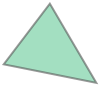

In [7]:
from vgrid.conversion.dggs2geo.isea4t2geo  import isea4t2geo

isea4t_geo = isea4t2geo(isea4t_id)
isea4t_geo

### ISEA4T to GeoJSON        

In [8]:
from vgrid.conversion.dggs2geo.isea4t2geo import isea4t2geojson

isea4t_geojson = isea4t2geojson(isea4t_id)
isea4t_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.70243255134056, 10.782716201741922),
      (106.69332798020412, 10.770749913453548),
      (106.71159691050727, 10.767101348690764),
      (106.70243255134056, 10.782716201741922)),)},
   'properties': {'isea4t': '13102313331320',
    'resolution': 12,
    'center_lat': 10.7735225,
    'center_lon': 106.7024525,
    'avg_edge_len': 1897.259,
    'cell_area': 1523297.174,
    'cell_perimeter': 5691.776}}]}

### Vector to ISEA4T

Processing features: 100%|██████████| 4/4 [00:00<00:00,  8.38it/s]


<Axes: >

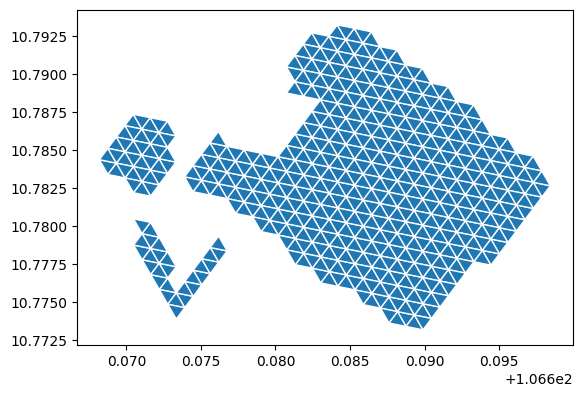

In [9]:
from vgrid.conversion.vector2dggs.vector2isea4t import vector2isea4t

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_isea4t = vector2isea4t(file_path, resolution=16, compact=False, 
                                predicate = "intersects",output_format="gpd")
# Visualize the output
vector_to_isea4t.plot(edgecolor="white")

### ISEA4T Compact

<Axes: >

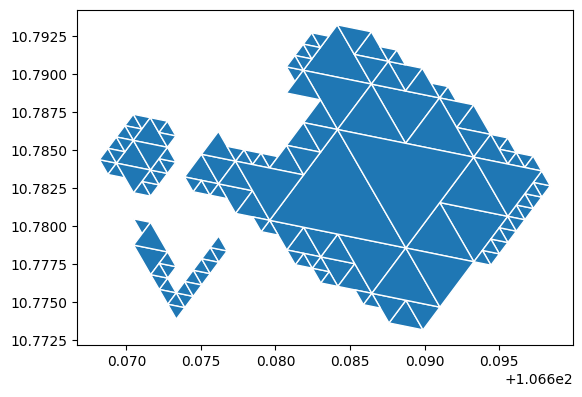

In [10]:
from vgrid.conversion.dggscompact.isea4tcompact import isea4tcompact

isea4t_compacted = isea4tcompact( vector_to_isea4t, output_format="gpd")
isea4t_compacted.plot(edgecolor="white")

### ISEA4T Expand

<Axes: >

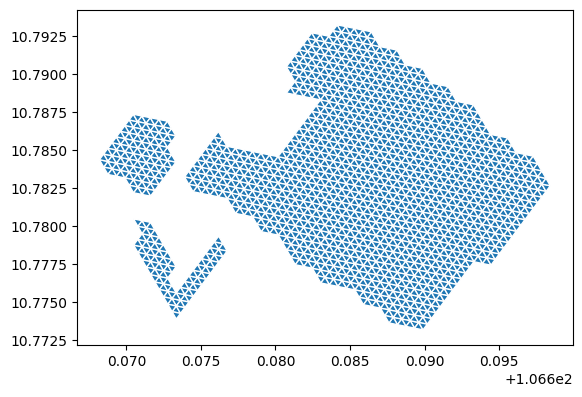

In [11]:
from vgrid.conversion.dggscompact.isea4tcompact import isea4texpand

isea4t_expanded = isea4texpand(
    vector_to_isea4t, resolution=17, output_format="gpd"
)
isea4t_expanded.plot(edgecolor="white")

### ISEA4T Binning

Generating ISEA4T DGGS: 100%|██████████| 767/767 [00:00<00:00, 1686.13 cells/s]


<Axes: >

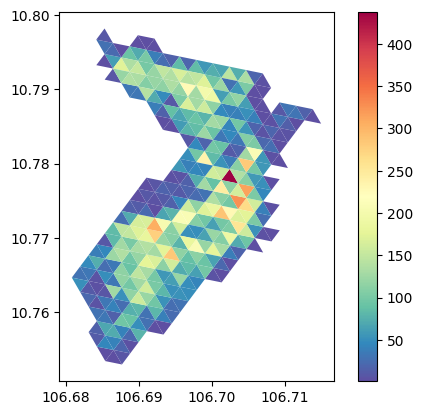

In [12]:
from vgrid.binning.isea4tbin import isea4tbin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
isea4t_bin = isea4tbin(file_path, resolution=15, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
isea4t_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)

### Raster to ISEA4T

In [13]:
# %pip install folium

In [14]:
from vgrid.conversion.raster2dggs.raster2isea4t import raster2isea4t
from vgrid.utils.io import download_file          

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_isea4t =  raster2isea4t(raster_file,output_format="gpd")

# Visualize the output 
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

isea4t_layer = folium.GeoJson(
    raster_to_isea4t,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["isea4t", "band_1", "band_2", "band_3"],
        aliases=["ISEA4T ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(isea4t_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest isea4t resolution determined: 23


Converting raster to ISEA4T: 100%|██████████| 8375/8375 [00:00<00:00, 13742.36 cells/s]


### ISEA4T Generator

Generating ISEA4T DGGS: 100%|██████████| 20/20 [00:00<00:00, 1288.85 cells/s]


<Axes: >

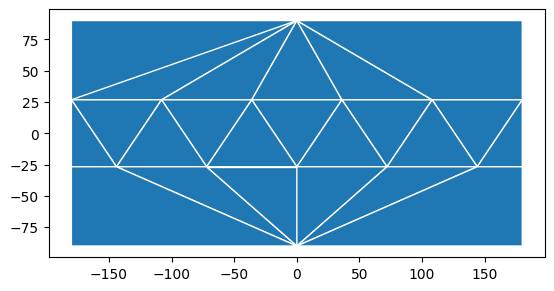

In [15]:
from vgrid.generator.isea4tgrid import isea4tgrid

isea4t_grid = isea4tgrid(resolution=0,output_format="gpd")
# isea4t_grid = isea4tgrid(resolution=16,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")

isea4t_grid.plot(edgecolor='white')

### ISEA4T Inspect

In [16]:
from vgrid.stats.isea4tstats import isea4tinspect
resolution = 5
isea4t_inspect = isea4tinspect(resolution)
isea4t_inspect.head()

Generating ISEA4T DGGS: 100%|██████████| 20480/20480 [00:04<00:00, 4096.87 cells/s]


isea4t  resolution  center_lat  center_lon  avg_edge_len     cell_area  \
0  0000000           5   52.798043 -144.000000    249995.286  2.706746e+10   
1  0000001           5   53.993894 -144.000000    230922.987  2.284392e+10   
2  0000002           5   52.190361 -145.690007    230945.739  2.284876e+10   
3  0000003           5   52.190361 -142.309993    230945.739  2.284876e+10   
4  0000010           5   50.215849 -144.000000    238726.467  2.462431e+10   

   cell_perimeter                                           geometry  crossed  \
0      749985.858  POLYGON ((-144 51.51071, -145.88123 53.44171, ...    False   
1      692768.962  POLYGON ((-144 55.09826, -145.88123 53.44171, ...    False   
2      692837.218  POLYGON ((-145.88123 53.44171, -147.18879 51.6...    False   
3      692837.218  POLYGON ((-142.11877 53.44171, -144 51.51071, ...    False   
4      716179.400  POLYGON ((-144 51.51071, -145.58435 49.56842, ...    False   

   norm_area       ipq       zsc  
0   1.086805  0.604716  0.777614  
1   0.917222  0.598141  0.773379  
2   0.917417  0.598150  0.773384  
3   0.917417  0.598150  0.773384  
4   0.988708  0.603296  0.776702

### Distribution of ISEA4T Area Distortions

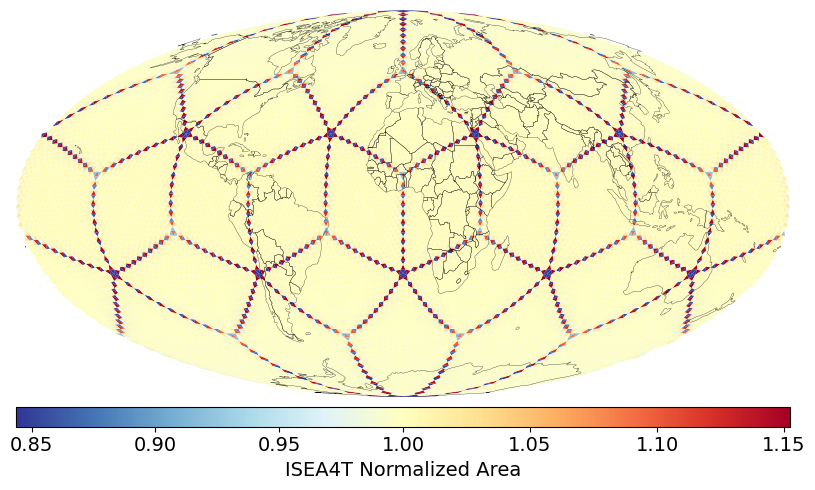

In [17]:
from vgrid.stats.isea4tstats import isea4t_norm_area
isea4t_norm_area(isea4t_inspect)

### Distribution of ISEA4T IPQ Compactness

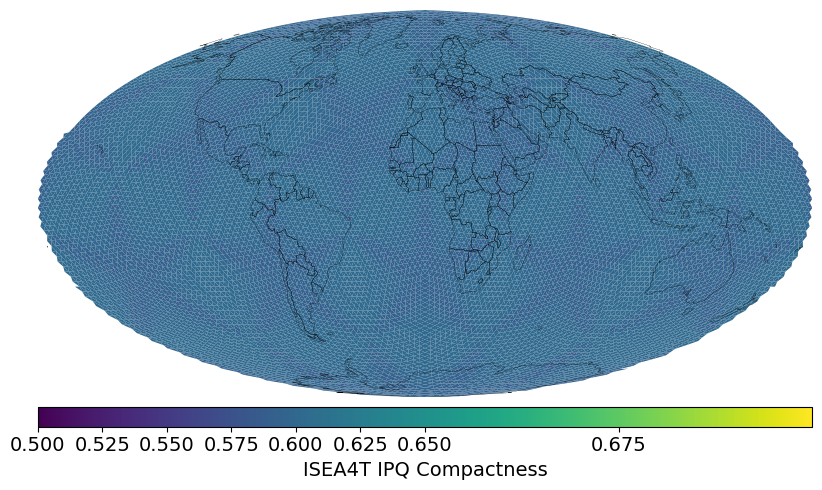

In [18]:
from vgrid.stats.isea4tstats import isea4t_compactness
isea4t_compactness(isea4t_inspect)

### ISEA4T Statistics

In [19]:
from vgrid.stats.isea4tstats import isea4tstats
isea4tstats('km')

resolution            number_of_cells  avg_edge_len_km  avg_cell_area_km2
0            0                         20     7.674458e+06       2.550328e+13
1            1                         80     3.837229e+06       6.375820e+12
2            2                        320     1.918614e+06       1.593955e+12
3            3                       1280     9.593072e+05       3.984888e+11
4            4                       5120     4.796536e+05       9.962219e+10
5            5                      20480     2.398268e+05       2.490555e+10
6            6                      81920     1.199134e+05       6.226387e+09
7            7                     327680     5.995670e+04       1.556597e+09
8            8                    1310720     2.997835e+04       3.891492e+08
9            9                    5242880     1.498918e+04       9.728730e+07
10          10                   20971520     7.494588e+03       2.432182e+07
11          11                   83886080     3.747294e+03       6.080456e+06
12          12                  335544320     1.873647e+03       1.520114e+06
13          13                 1342177280     9.368235e+02       3.800285e+05
14          14                 5368709120     4.684117e+02       9.500713e+04
15          15                21474836480     2.342059e+02       2.375178e+04
16          16                85899345920     1.171029e+02       5.937945e+03
17          17               343597383680     5.855147e+01       1.484486e+03
18          18              1374389534720     2.927573e+01       3.711216e+02
19          19              5497558138880     1.463787e+01       9.278040e+01
20          20             21990232555520     7.318933e+00       2.319510e+01
21          21             87960930222080     3.659467e+00       5.798775e+00
22          22            351843720888320     1.829733e+00       1.449694e+00
23          23           1407374883553280     9.148667e-01       3.624234e-01
24          24           5629499534213120     4.574333e-01       9.060586e-02
25          25          22517998136852480     2.287167e-01       2.265146e-02
26          26          90071992547409920     1.143583e-01       5.662866e-03
27          27         360287970189639680     5.717917e-02       1.415717e-03
28          28        1441151880758558720     2.858958e-02       3.539291e-04
29          29        5764607523034234880     1.429479e-02       8.848228e-05
30          30       23058430092136939520     7.147396e-03       2.212057e-05
31          31       92233720368547758080     3.573698e-03       5.530143e-06
32          32      368934881474191032320     1.786849e-03       1.382536e-06
33          33     1475739525896764129280     8.934245e-04       3.456339e-07
34          34     5902958103587056517120     4.467122e-04       8.640848e-08
35          35    23611832414348226068480     2.233561e-04       2.160212e-08
36          36    94447329657392904273920     1.116781e-04       5.400530e-09
37          37   377789318629571617095680     5.583903e-05       1.350132e-09
38          38  1511157274518286468382720     2.791952e-05       3.375331e-10
39          39  6044629098073145873530880     1.395976e-05       8.438328e-11